# Covid-19: Deaths

## Get Data and clean up
Removing Lat&Long. Not needed.

In [1]:
import pandas as pd
df = pd.read_csv('data/time_series_19-covid-Deaths.csv')
df = df.drop(columns=['Lat', 'Long'])


## Group by Countries
1. Group by countries 
2. get Dataframes for each country I would like to plot
3. get all aggregated


In [2]:
df_group = df.groupby(['Country/Region'])

In [3]:
germany = df_group.get_group('Germany')
china = df_group.get_group('Mainland China')

In [4]:
overall = df.agg(['sum'])
overall = overall.drop(columns=['Country/Region'])

## Clean up and summarize China
1. Clean data, remove columns with no numbers
2. Transpose DF

In [5]:
china = china.agg(['sum'])
china = china.drop(columns=['Province/State', 'Country/Region'])

In [6]:
china = china.T

## Clean up and summarize Germany

In [7]:
germany = germany.agg(['sum'])
germany = germany.drop(columns=['Province/State', 'Country/Region'])

In [8]:
germany = germany.T

## Transpose overall data

In [9]:
overall = overall.T

## Plot China & Germany in one Graph

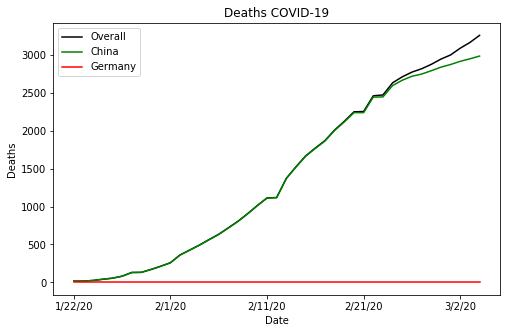

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ax = plt.gca()

overall.plot(kind='line',y='sum',ax=ax, label="Overall", color='black')
china.plot(kind='line',y='sum',ax=ax, label="China", color="green")
germany.plot(kind='line',y='sum',ax=ax, color='red', label="Germany")

plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Deaths COVID-19')
plt.savefig('detahs_compared.png', dpi=300)
plt.show()

## Plot Germany only

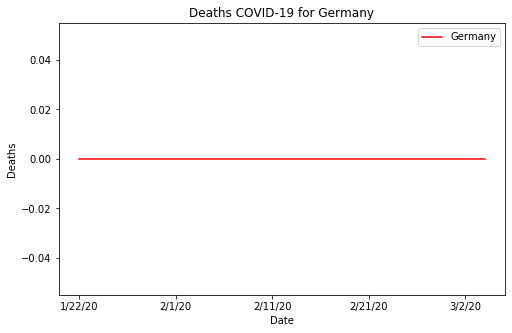

In [11]:
plt.figure(figsize=(8,5))
ax = plt.gca()

germany.plot(kind='line',y='sum',ax=ax, color='red', label="Germany")
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Deaths COVID-19 for Germany')
plt.savefig('death_germany.png', dpi=300)
plt.show()

## Plot Confirmed <-> Deaths China

In [12]:
confirmed_cn = pd.read_csv('data/confirmed_china.csv')

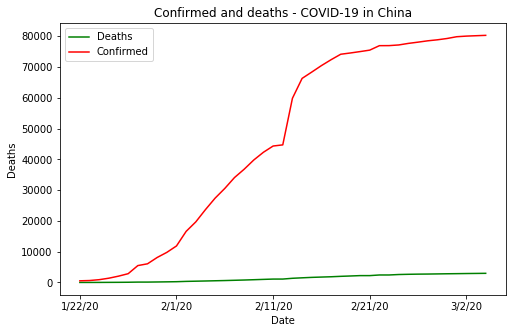

In [13]:
plt.figure(figsize=(8,5))
ax = plt.gca()

china.plot(kind='line',y='sum',ax=ax, label="Deaths", color="green")
confirmed_cn.plot(kind='line',y='sum',ax=ax, color='red', label="Confirmed")

plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Confirmed and deaths - COVID-19 in China')
plt.savefig('deaths_confirmed_compared.png', dpi=300)
plt.show()

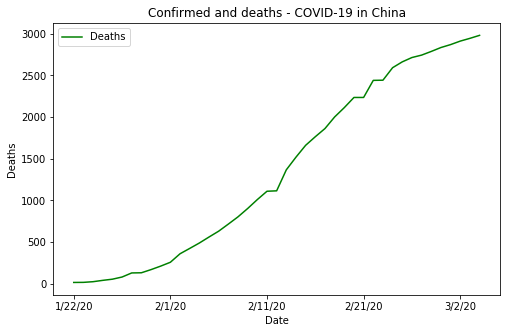

In [14]:
plt.figure(figsize=(8,5))
ax = plt.gca()

china.plot(kind='line',y='sum',ax=ax, label="Deaths", color="green")

plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Confirmed and deaths - COVID-19 in China')
plt.savefig('deaths_china.png', dpi=300)
plt.show()

## Plot Overall Confirmed -> Deaths

In [15]:
confirmed_overall = pd.read_csv('data/confirmed_overall.csv')

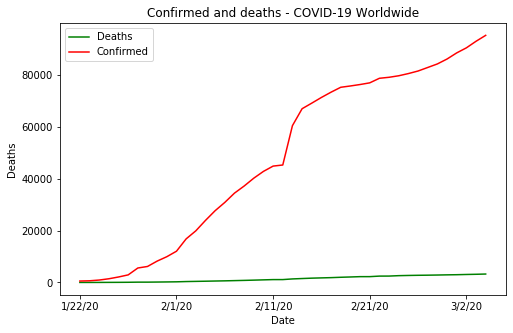

In [16]:
plt.figure(figsize=(8,5))
ax = plt.gca()

overall.plot(kind='line',y='sum',ax=ax, label="Deaths", color="green")
confirmed_overall.plot(kind='line',y='sum',ax=ax, color='red', label="Confirmed")

plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Confirmed and deaths - COVID-19 Worldwide')
plt.savefig('deaths_overall.png', dpi=300)
plt.show()